In [2]:
import pandas as pd
import os.path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
dataset = pd.read_csv('results/monitoring.csv', sep='\t')
keys_as_float = ['tmp', 'val', 'config', 'sb_oc', 'sb_unused']
for key in keys_as_float: dataset[key] = dataset[key].apply(lambda x : None if x == 'None' else float(x))

In [16]:
dataset.head()

,tmp,rec,res,val,config,subset,vm_uuid,vm_cmn,sb_oc,sb_unused,sb_dsc
0,104.0,subset,cpu,NaN,3.0,subset-1.0,None,None,1.0,0.0,"{""res_list"": [{""cpu_id"": 0, ""numa_node"": 0, ""s..."
1,104.0,subset,cpu,NaN,1.0,subset-2.0,None,None,2.0,0.0,"{""res_list"": [{""cpu_id"": 64, ""numa_node"": 1, ""..."
2,104.0,subset,mem,0.113013,6144.0,subset-1,None,None,1.0,0.0,"{""res_list"": [[0, 6144]], ""consumer_list"": [{""..."
3,108.0,subset,cpu,NaN,5.0,subset-1.0,None,None,1.0,0.0,"{""res_list"": [{""cpu_id"": 0, ""numa_node"": 0, ""s..."
4,108.0,vm,cpu,NaN,1.0,subset-1.0,691c098a-3873-4c78-91fb-b5251f44b96f,vm8,1.0,NaN,None


# Investigate CPU usage

In [27]:
subsets = dataset.loc[dataset['rec'] == 'subset']
subsets_cpu = subsets.loc[dataset['res'] == 'cpu']
subsets_mem = subsets.loc[dataset['rec'] == 'mem']

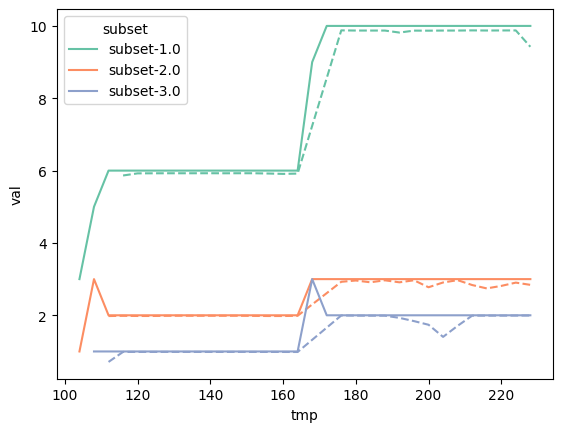

In [57]:
palette = sns.color_palette("Set2", subsets_cpu['subset'].nunique())

g_val = sns.lineplot(data=subsets_cpu, x='tmp', y='val', hue='subset', linestyle ='--', palette=palette, legend=False)
g_config = sns.lineplot(data=subsets_cpu, x='tmp', y='config', hue='subset', palette=palette)

# Investigate VM usage

In [59]:
vm = dataset.loc[dataset['rec'] == 'vm']
vm_cpu = vm.loc[dataset['res'] == 'cpu']
vm_mem = vm.loc[dataset['rec'] == 'mem']

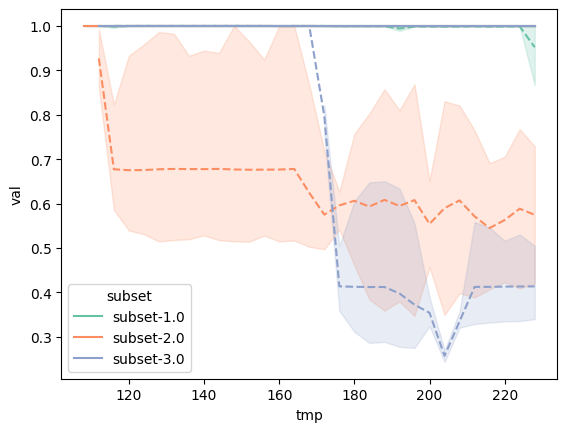

In [60]:
palette = sns.color_palette("Set2", vm_cpu['subset'].nunique())

g_val = sns.lineplot(data=vm_cpu, x='tmp', y='val', hue='subset', linestyle ='--', palette=palette, legend=False)
g_config = sns.lineplot(data=vm_cpu, x='tmp', y='config', hue='subset', palette=palette)